In [1]:
# coding=utf-8
from lytools import *  ## pip install lytools==0.0.47
from scipy.stats import f_oneway
data_path = '../../data/SI_Fig01'
land_path = '../../data/common_data/land_mask.tif'

lytools version 0.0.47


In [2]:
def plot_spatial(ax,fpath,vmin=None,vmax=None):
    ## plot spatial figure
    array = ToRaster().raster2array(fpath)[0]
    # mask nan values
    array[array < -9999] = np.nan
    # above 30 degree
    array = array[:120]
    # plot the spatial figure
    # plt.figure(figsize=(8, 4))
    pcm = ax.imshow(array, cmap='Spectral_r', vmin=vmin, vmax=vmax, aspect='auto', interpolation='nearest')
    # plt.colorbar()
    # plot the land mask
    arr = ToRaster().raster2array(land_path)[0]
    back_ground = []
    for i in range(len(arr)):
        temp = []
        for j in range(len(arr[0])):
            val = arr[i][j]
            if val < -90000:
                temp.append(np.nan)
            else:
                temp.append(1)
        back_ground.append(temp)
    back_ground = np.array(back_ground)
    ax.imshow(back_ground[:int(len(arr) / 2)], 'gray', vmin=0, vmax=1.4, zorder=-1, aspect='auto', interpolation='nearest')
    return pcm


In [5]:
def plot_SI_Fig01():
    ## plot figure S1
    vegetation_product_list = ['NDVI','CSIF','VOD']
    SPEI_scale_list = [3,6,9,12]
    fig,axs = plt.subplots(3,4,figsize=(14,8))
    row = 0
    for vegetation_product in vegetation_product_list:
        folder_name = f'SPEI36912_{vegetation_product}_correlation'
        col = 0
        for SPEI_scale in SPEI_scale_list:
            fname = f'{vegetation_product}_SPEI{SPEI_scale:02d}_corr.tif'
            fpath = join(data_path, folder_name, fname)
            ax = axs[row][col]
            pcm = plot_spatial(ax,fpath,vmin=-0.4,vmax=0.4)
            if vegetation_product == 'NDVI':
                ax.set_title(f'SPEI{SPEI_scale}')
            if SPEI_scale == 3:
                ax.set_ylabel(f'{vegetation_product}')
            ax.set_xticks([])
            ax.set_yticks([])
            col += 1
        row += 1

    fig.colorbar(pcm,ax=[axs[:, :]], location='right', shrink=.5,label='Correlation coefficient')
    plt.show()
    pass


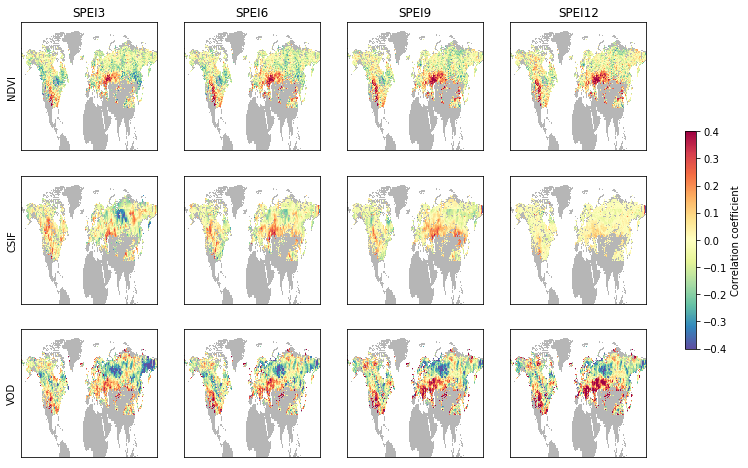

In [7]:
plot_SI_Fig01()